# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Collective data

In [2]:
df = pd.read_csv('../datasets/apartments_collective.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           17932 non-null  int64  
 1   url                                  17932 non-null  object 
 2   name/title                           17932 non-null  object 
 3   address                              17932 non-null  object 
 4   price                                17932 non-null  float64
 5   area                                 17932 non-null  float64
 6   price-per-area                       17932 non-null  float64
 7   floor/store                          17932 non-null  int64  
 8   no of floors/stores in the building  17932 non-null  int64  
 9   no of rooms                          17932 non-null  int64  
 10  year of construction                 17932 non-null  float64
 11  parking space               

In [4]:
df.head()

,Unnamed: 0,url,name/title,address,price,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,market,form of ownership,location,latitude,longitude,distance,district
0,0,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"103171, Mistrzejowice, Kraków, małopolskie",1087000.0,74.80,14532.09,6,7,3,2016.0,True,wtórny,pełna własność,"Mistrzejowice, Kraków, województwo małopolskie...",50.097426,20.009603,6.500728,Mistrzejowice
1,1,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.00,17187.50,4,8,1,2012.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
2,2,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.30,17028.00,4,10,1,1985.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
3,3,https://krakow.nieruchomosci-online.pl/mieszka...,"Apartament, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2290000.0,155.16,14758.96,0,2,5,2009.0,True,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
4,4,https://krakow.nieruchomosci-online.pl/mieszka...,"Mieszkanie, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2399000.0,139.00,17258.99,1,2,3,2022.0,False,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec


### Prepare data for analysis

In [3]:
# Drop unnecessary columns

columns_to_drop = ['Unnamed: 0', 'url', 'name/title', 'address', 'location', 'latitude', 'longitude', 'form of ownership', 'district', 'price']

df_reduced = df.drop(columns=columns_to_drop)

In [4]:
df_reduced['market'].unique()

array(['wtórny', 'pierwotny'], dtype=object)

In [5]:
df_reduced['market'] = df_reduced['market'].map({'pierwotny': 0, 'wtórny': 1})

In [63]:
df_reduced['market'].unique()

array([1, 0], dtype=int64)

In [6]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   area                                 17932 non-null  float64
 1   price-per-area                       17932 non-null  float64
 2   floor/store                          17932 non-null  int64  
 3   no of floors/stores in the building  17932 non-null  int64  
 4   no of rooms                          17932 non-null  int64  
 5   year of construction                 17932 non-null  float64
 6   parking space                        17932 non-null  bool   
 7   market                               17932 non-null  int64  
 8   distance                             17932 non-null  float64
dtypes: bool(1), float64(4), int64(4)
memory usage: 1.1 MB


### Pearson Correlation

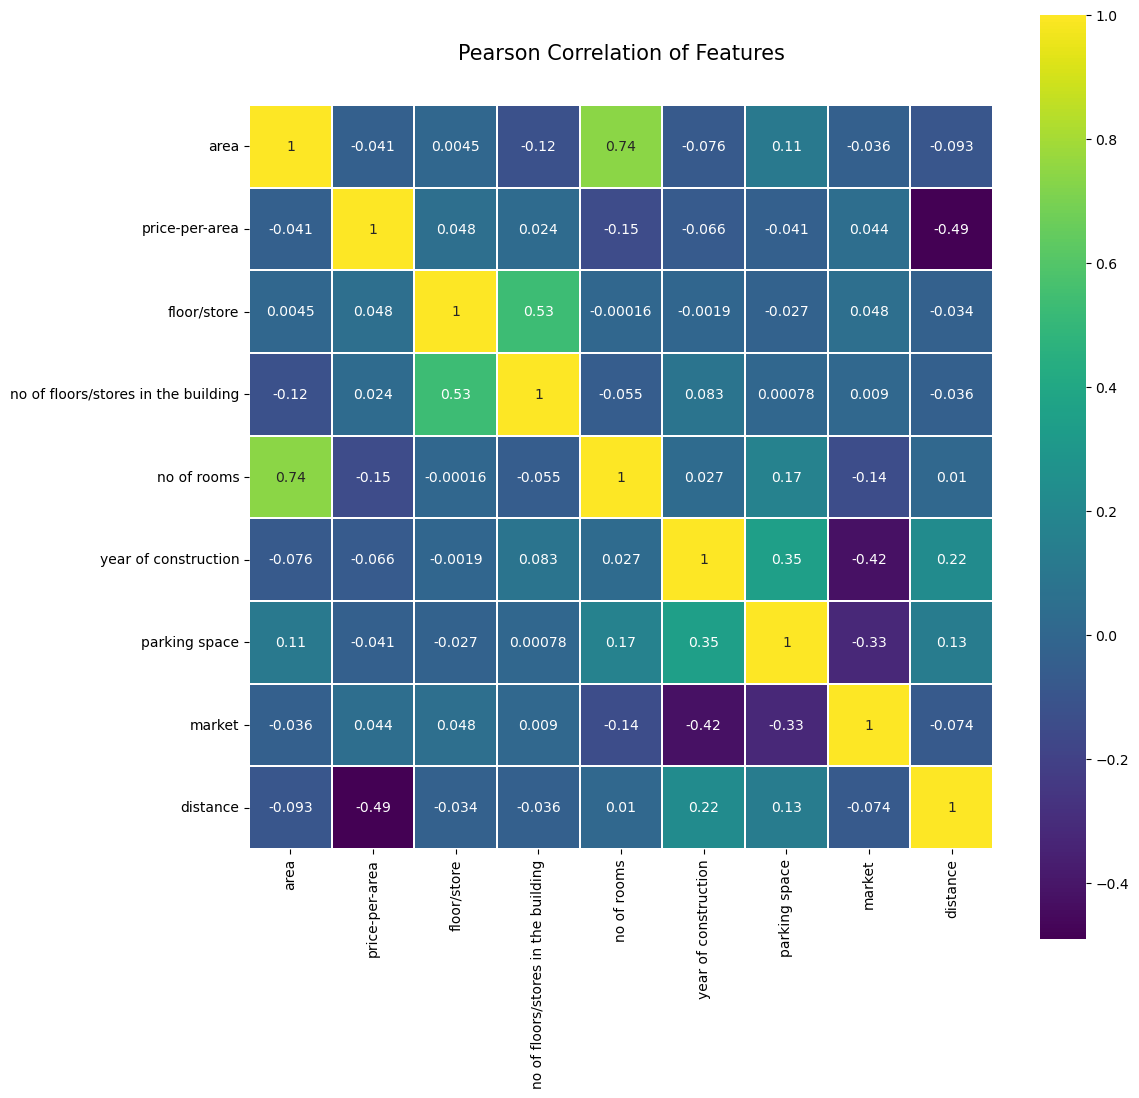

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_reduced.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### Prices in various districts

In [65]:
df['district'].unique()

array(['Mistrzejowice', 'Czyżyny', 'Zwierzyniec', 'Prądnik Biały',
       'Bieżanów-Prokocim', 'Stare Miasto', 'Prądnik Czerwony',
       'Bronowice', 'Bieńczyce', 'Krowodrza', 'Grzegórzki', 'Nowa Huta',
       'Podgórze', 'Wzgórza Krzesławickie', 'Swoszowice', 'Dębniki',
       'Podgórze Duchackie', 'Łagiewniki-Borek Fałęcki', 'Wawel'],
      dtype=object)

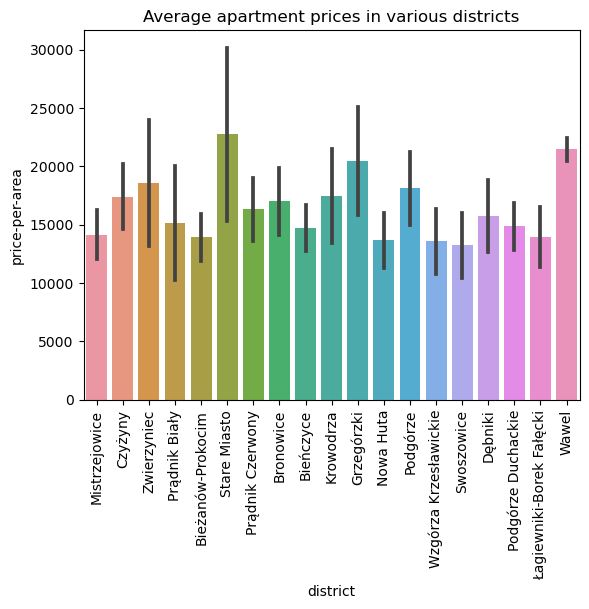

In [66]:
sns.barplot(x='district', y='price-per-area', data=df, errorbar='sd') 
plt.xticks(rotation=90)
plt.title('Average apartment prices in various districts')
plt.show()